# Tracks Genre Classification

- What does each playlist set sound like? What are their defining characteristics?

- Using user-marked playlist genres as training data, can we build a model to correctly classify songs from a separate track dataset?

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\matplo

### 1. Read and check values of 2 playlist sets

In [2]:
# set keyword
KEYWORD1='rock'

In [3]:
# read and process the playlist data for keyword
playlist1_df = pd.read_csv('data/'+KEYWORD1+'_playlist_data.csv')
playlist1_df.head()

,playlist_id,playlist_name,playlist_total_tracks,owner_id,owner_name,total_followers
0,37i9dQZF1DWXRqgorJj26U,Rock Classics,145,spotify,Spotify,8713321
1,37i9dQZF1DXcF6B6QPhFDv,Rock This,50,spotify,Spotify,4490497
2,37i9dQZF1DX1rVvRgjX59F,90s Rock Anthems,150,spotify,Spotify,4091838
3,37i9dQZF1DWYN0zdqzbEwl,Rock en Español,60,spotify,Spotify,3825910
4,37i9dQZF1DX6xOPeSOGone,Soft Rock,100,spotify,Spotify,2801391


In [4]:
playlist1_df.shape

(98, 6)

In [5]:
# read and process the playlist data for keyword
tracks1_df = pd.read_csv('data/'+KEYWORD1+'_playlist_tracks_data.csv')\
                .merge(pd.read_csv('data/'+KEYWORD1+'_playlist_tracks.csv')[['track_id','playlist_id','playlist_name']],\
                      on='track_id',how='left')
# make duration ms to minutes
tracks1_df['duration_mins']=tracks1_df['duration']/60000
# tag genre with keyword
tracks1_df['genre']=KEYWORD1
tracks1_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,instrumentalness,liveness,valence,tempo,playlist_id_x,playlist_name_x,playlist_id_y,playlist_name_y,duration_mins,genre
0,0hCB0YR03f6AmQaHbwWDe8,Whole Lotta Love - 1990 Remaster,36QJpDe2go2KgaRleHCDTp,Led Zeppelin,70lQYZtypdCALtFVlQAcvx,333893,1969-10-22,78,0.412,0.902,...,0.131000,0.4050,0.422,89.740,37i9dQZF1DWXRqgorJj26U,Rock Classics,37i9dQZF1DWXRqgorJj26U,Rock Classics,5.564883,rock
1,0hCB0YR03f6AmQaHbwWDe8,Whole Lotta Love - 1990 Remaster,36QJpDe2go2KgaRleHCDTp,Led Zeppelin,70lQYZtypdCALtFVlQAcvx,333893,1969-10-22,78,0.412,0.902,...,0.131000,0.4050,0.422,89.740,37i9dQZF1DWXRqgorJj26U,Rock Classics,37i9dQZF1DWWRktbhJiuqL,Pure Rock & Roll,5.564883,rock
2,2aoo2jlRnM3A0NyLQqMN2f,All Along the Watchtower,776Uo845nYHJpNaStv1Ds4,Jimi Hendrix,5z090LQztiqh13wYspQvKQ,240800,1968-10-25,79,0.438,0.805,...,0.000057,0.0842,0.564,113.253,37i9dQZF1DWXRqgorJj26U,Rock Classics,37i9dQZF1DWXRqgorJj26U,Rock Classics,4.013333,rock
3,2aoo2jlRnM3A0NyLQqMN2f,All Along the Watchtower,776Uo845nYHJpNaStv1Ds4,Jimi Hendrix,5z090LQztiqh13wYspQvKQ,240800,1968-10-25,79,0.438,0.805,...,0.000057,0.0842,0.564,113.253,37i9dQZF1DWXRqgorJj26U,Rock Classics,37i9dQZF1DWWRktbhJiuqL,Pure Rock & Roll,4.013333,rock
4,2aoo2jlRnM3A0NyLQqMN2f,All Along the Watchtower,776Uo845nYHJpNaStv1Ds4,Jimi Hendrix,5z090LQztiqh13wYspQvKQ,240800,1968-10-25,79,0.438,0.805,...,0.000057,0.0842,0.564,113.253,37i9dQZF1DWXRqgorJj26U,Rock Classics,37i9dQZF1DWZYWNM3NfvzJ,Beast Mode Rock,4.013333,rock


In [6]:
tracks1_df.shape

(1953, 25)

In [7]:
# How many unique tracks are in playlist set 1?
len(tracks1_df['track_id'].unique())

1532

<AxesSubplot:>

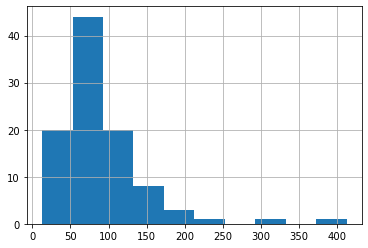

In [8]:
# What is the distribution of playlist set 1's total tracks?
playlist1_df['playlist_total_tracks'].hist()

In [9]:
len(playlist1_df[playlist1_df['playlist_total_tracks']>10])

98

<AxesSubplot:>

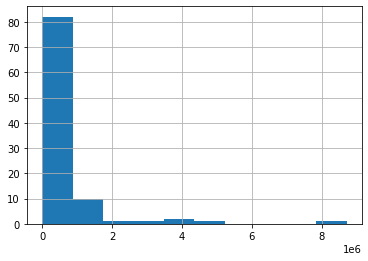

In [10]:
# What is the distribution of playlist set 1's total tracks?
playlist1_df['total_followers'].hist()

In [11]:
###################### set keyword
KEYWORD2='R&B'

In [12]:
# read and process the playlist data for keyword
playlist2_df = pd.read_csv('data/'+KEYWORD2+'_playlist_data.csv')
playlist2_df.head(20)

,playlist_id,playlist_name,playlist_total_tracks,owner_id,owner_name,total_followers
0,37i9dQZF1DWYmmr74INQlb,I Love My '00s R&B,40,spotify,Spotify,3343023
1,37i9dQZF1DX6VDO8a6cQME,I Love My '90s R&B,45,spotify,Spotify,2486483
2,37i9dQZF1DX2UgsUIg75Vg,Chilled R&B,50,spotify,Spotify,2070234
3,37i9dQZF1DWSfMe9z89s9B,Alternative R&B,100,spotify,Spotify,957270
4,37i9dQZF1DXbirtHQBuwCo,TrenChill K-R&B,70,spotify,Spotify,535401
5,37i9dQZF1DX1wNY9tfWQsS,Women of R&B,70,spotify,Spotify,361708
6,37i9dQZF1DX2WkIBRaChxW,R&B Right Now,55,spotify,Spotify,331776
7,36scvoM0cRA50MCZGhv3wo,R&B Party Classics,134,sonymusicentertainment,Filtr Sweden,314057
8,37i9dQZF1DXch2nNxu927l,Suprême R&B,50,spotify,Spotify,275771
9,37i9dQZF1DWXbttAJcbphz,I Love My '10s R&B,50,spotify,Spotify,234940


In [13]:
playlist2_df.shape

(59, 6)

In [14]:
# read and process the playlist data for keyword
tracks2_df = pd.read_csv('data/'+KEYWORD2+'_playlist_tracks_data.csv')\
                .merge(pd.read_csv('data/'+KEYWORD2+'_playlist_tracks.csv')[['track_id','playlist_id','playlist_name']],\
                      on='track_id',how='left')
# make duration ms to minutes
tracks2_df['duration_mins']=tracks2_df['duration']/60000
# tag genre with keyword
tracks2_df['genre']=KEYWORD2
tracks2_df.head()

,track_id,track_name,artist_id,artist_name,album_id,duration,release_date,popularity,danceability,energy,...,instrumentalness,liveness,valence,tempo,playlist_id_x,playlist_name_x,playlist_id_y,playlist_name_y,duration_mins,genre
0,0XkQ23l4GT8sFHgeNRGAO4,LET'S GET MARRIED,2HPaUgqeutzr3jx5a9WyDV,PARTYNEXTDOOR,2Uyia7M6Hv8XmhMSEbpfgm,224014,2021-01-29,60,0.501,0.643,...,0.000137,0.151,0.220,130.850,37i9dQZF1DX4SBhb3fqCJd,Are & Be,37i9dQZF1DX4SBhb3fqCJd,Are & Be,3.733567,R&B
1,0XkQ23l4GT8sFHgeNRGAO4,LET'S GET MARRIED,2HPaUgqeutzr3jx5a9WyDV,PARTYNEXTDOOR,2Uyia7M6Hv8XmhMSEbpfgm,224014,2021-01-29,60,0.501,0.643,...,0.000137,0.151,0.220,130.850,37i9dQZF1DX4SBhb3fqCJd,Are & Be,37i9dQZF1DWUzFXarNiofw,The Newness,3.733567,R&B
2,0XkQ23l4GT8sFHgeNRGAO4,LET'S GET MARRIED,2HPaUgqeutzr3jx5a9WyDV,PARTYNEXTDOOR,2Uyia7M6Hv8XmhMSEbpfgm,224014,2021-01-29,60,0.501,0.643,...,0.000137,0.151,0.220,130.850,37i9dQZF1DX4SBhb3fqCJd,Are & Be,37i9dQZF1DX2WkIBRaChxW,R&B Right Now,3.733567,R&B
3,3YJJjQPAbDT7mGpX3WtQ9A,Good Days,7tYKF4w9nC0nq9CsPZTHyP,SZA,781cKhbTPwLnPmo9BALQl7,279204,2020-12-25,92,0.436,0.655,...,0.000008,0.688,0.412,121.002,37i9dQZF1DX4SBhb3fqCJd,Are & Be,37i9dQZF1DX4SBhb3fqCJd,Are & Be,4.653400,R&B
4,3YJJjQPAbDT7mGpX3WtQ9A,Good Days,7tYKF4w9nC0nq9CsPZTHyP,SZA,781cKhbTPwLnPmo9BALQl7,279204,2020-12-25,92,0.436,0.655,...,0.000008,0.688,0.412,121.002,37i9dQZF1DX4SBhb3fqCJd,Are & Be,37i9dQZF1DWSfMe9z89s9B,Alternative R&B,4.653400,R&B


In [15]:
tracks2_df.shape

(1194, 25)

In [16]:
# How many unique tracks are in playlist 2?
len(tracks2_df['track_id'].unique())

1058

## 2. Compare histograms of 2 playlist sets

C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


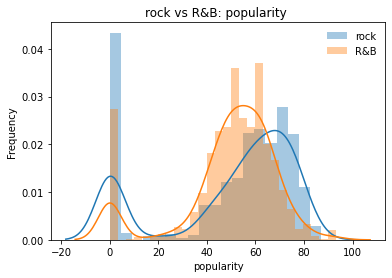

C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


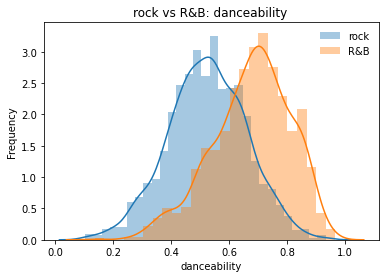

C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


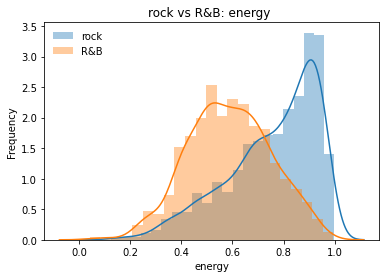

C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


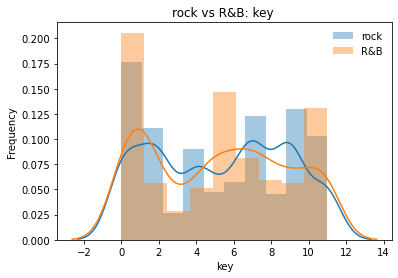

C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


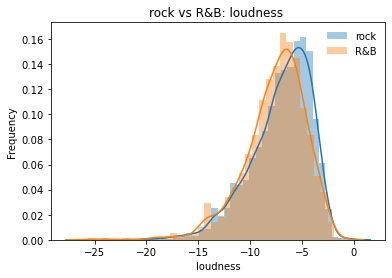

C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


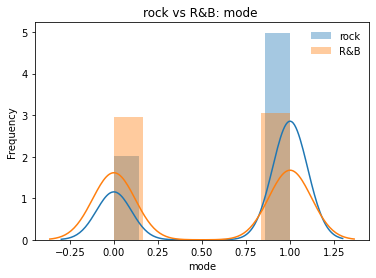

C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


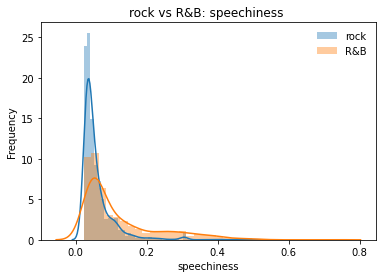

C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


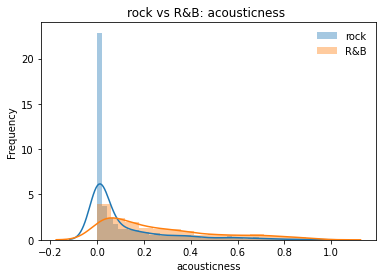

C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


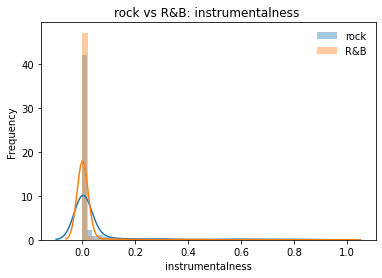

C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


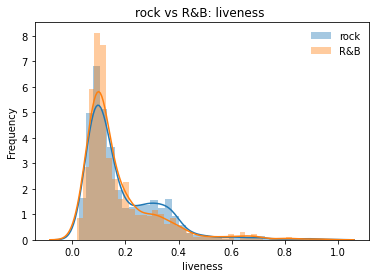

C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


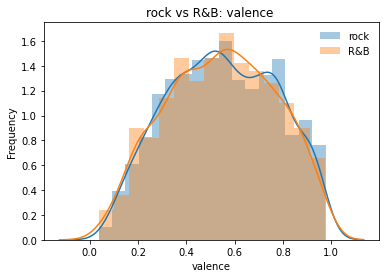

C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


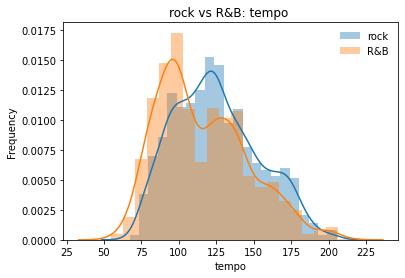

In [17]:
for col in ['popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']:
    fig = plt.figure()
    ax= fig.add_subplot(111)
    
    sns.distplot(tracks1_df[col], ax=ax, label= KEYWORD1)
    sns.distplot(tracks2_df[col], ax=ax, label= KEYWORD2)
    plt.title("%s vs %s: %s " % (KEYWORD1,KEYWORD2,col))
    plt.ylabel('Frequency')
    plt.legend(frameon=False)
    plt.show()


>Q: What feature/s best distinguish the 2 categories from each other? Does it make sense to use this as a feature for a classification model?

## 3. Feature Engineering

In [18]:
# get union of two playlist tracks list
tracks_df = pd.concat([tracks1_df,tracks2_df])
tracks1_df.shape, tracks2_df.shape, tracks_df.shape

((1953, 25), (1194, 25), (3147, 25))

In [19]:
# retain only distinct tracks per keyword
tracks_df = tracks_df.drop_duplicates(subset='track_id')
tracks_df.shape

(2588, 25)

In [20]:
# normalize loudness
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

tracks_df['loudness'] = scaler.fit_transform(tracks_df[['loudness']])
tracks_df['loudness'].describe()


count    2588.000000
mean        0.725304
std         0.117219
min         0.000000
25%         0.660831
50%         0.744593
75%         0.809561
max         1.000000
Name: loudness, dtype: float64

In [21]:
# normalize tempo
tracks_df['tempo'] =  scaler.fit_transform(tracks_df[['tempo']])
# check
tracks_df['tempo'].describe()


count    2588.000000
mean        0.416943
std         0.183145
min         0.000000
25%         0.270097
50%         0.406310
75%         0.534084
max         1.000000
Name: tempo, dtype: float64

In [22]:
# map genres to numbers
tracks_df['genre_id'] = tracks_df['genre'].map({KEYWORD1:1,KEYWORD2:2})

## 4. Preview possible groupings

>Q: Pick the 2 best distinguishing features of the 2 playlist sets and plot each row as a scatterplot/distplot colored by genre


<AxesSubplot:xlabel='energy', ylabel='tempo'>

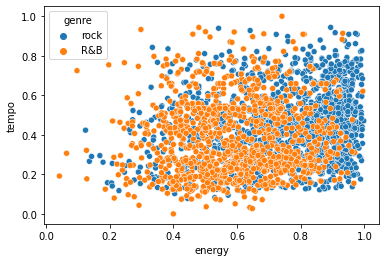

In [23]:
sns.scatterplot(data=tracks_df, x='energy', y='tempo', hue='genre')

C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rowen\.conda\envs\dsfc7\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_

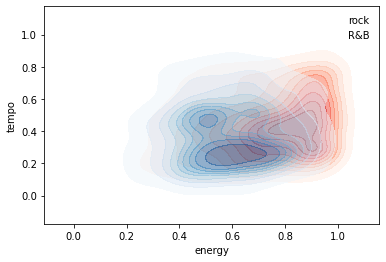

In [24]:
fig = plt.figure()
ax= fig.add_subplot(111)

colormaps = ['Reds','Blues']
for n,genre in enumerate([KEYWORD1,KEYWORD2]):
    df=tracks_df[tracks_df['genre']==genre]
    sns.kdeplot(df['energy'],df['tempo'], ax=ax,\
                shade=True, shade_lowest=False, alpha=0.5, cmap=colormaps[n],\
                label=genre)
    
plt.legend(frameon=False)


> Q: How would you interpret the resulting scatterplot/distribution?

## _TIP:_ `YOU COULD SKIP STEPS 1 TO 4 ABOVE AND SIMPLY START HERE`
# 1. Read and check values of playlist sets from KEYWORDS
# 2. Compare histograms of playlist sets from KEYWORDS
# 3. Feature Engineering
# 4. SKIPPED

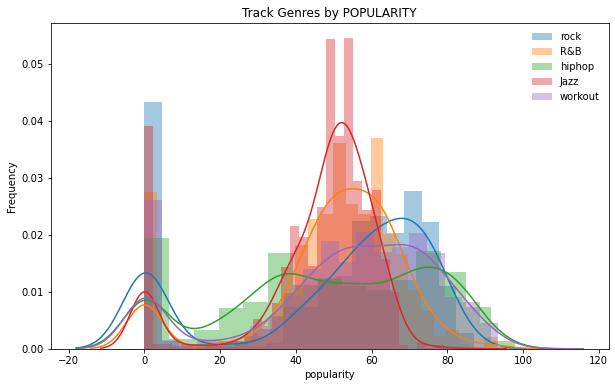

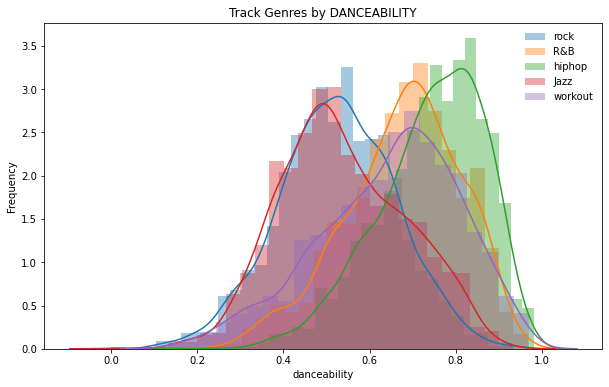

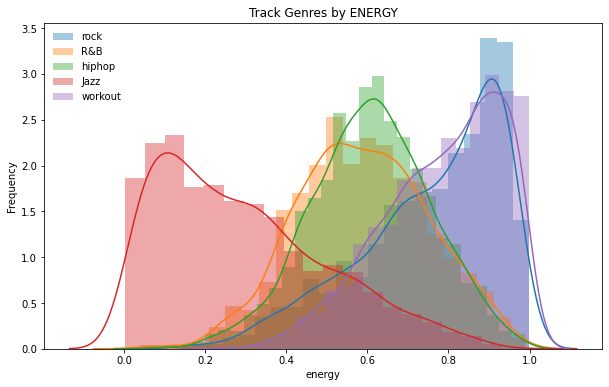

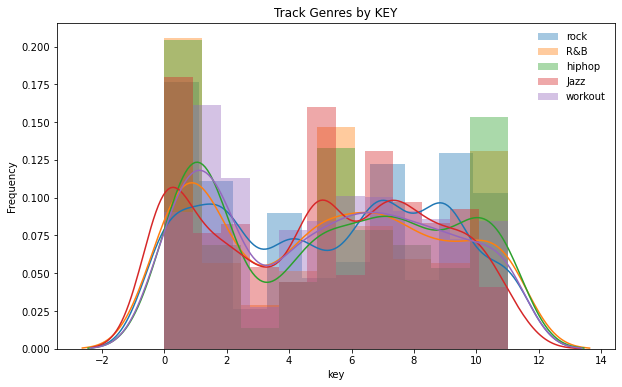

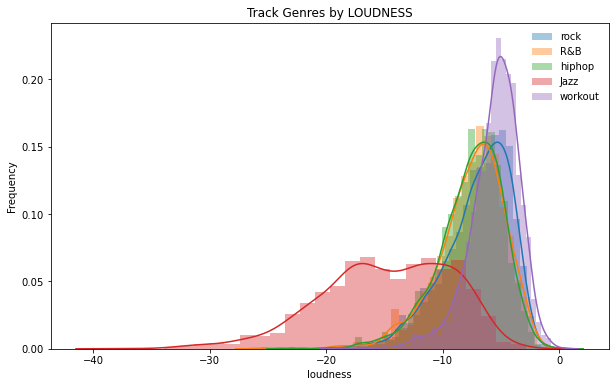

In [ ]:
import warnings
warnings.filterwarnings("ignore")

tracks_df = None




### 1. Read and check values of playlist sets from KEYWORDS
KEYWORDS = ['rock', 'R&B', 'hiphop', 'Jazz', 'workout'] # PLAY AROUND WITH GENRE COMBINATIONS TO IMPROVE ACCURACY SCORES OF THE MODELS
for keyword in KEYWORDS:
    # read and process the playlist data for each keyword
    playlist_df = pd.read_csv('data/' + keyword + '_playlist_data.csv')

    # read and process the playlist data for keyword
    tmp_tracks_df = pd.read_csv('data/' + keyword + '_playlist_tracks_data.csv')\
                    .merge(pd.read_csv('data/'+ keyword +'_playlist_tracks.csv')[['track_id','playlist_id','playlist_name']],\
                        on='track_id',how='left')
    
    # make duration ms to minutes
    tmp_tracks_df['duration_mins'] = tmp_tracks_df['duration']/60000
    
    # tag genre with keyword
    tmp_tracks_df['genre'] = keyword

    # get union of two playlist tracks list
    tracks_df = pd.concat([tracks_df, tmp_tracks_df])





### 2. Compare (audio features) histograms of playlist sets from KEYWORDS
FEATURES = ['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
for col in FEATURES:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)

    for keyword in KEYWORDS: 
        df = tracks_df[tracks_df.genre == keyword]
        sns.distplot(df[col], ax=ax, label=keyword)
    
    plt.title(f'Track Genres by {col.upper()}')
    plt.ylabel('Frequency')
    plt.legend(frameon=False)
    plt.show()





### 3. Feature Engineering
# retain only distinct tracks per keyword
tracks_df = tracks_df.drop_duplicates(subset='track_id')
print(f'\n\n\ntracks_df shape: {tracks_df.shape}\n\n')

# normalize `loudness` and `tempo`
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
tracks_df[['loudness', 'tempo']] = scaler.fit_transform(tracks_df[['loudness', 'tempo']])
print('\n\n\nNormalize `loudness` and `tempo`')
print(tracks_df[['loudness', 'tempo']].describe())

# map genres to numbers
tracks_df['genre_id'] = tracks_df['genre'].map( {k: v+1 for v, k in enumerate(KEYWORDS)} )
print('\n\n\nMap `Genres` to Numbers')
print(tracks_df['genre_id'].value_counts())


## 5. Model Tuning: kNN

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score,roc_curve, auc, confusion_matrix, classification_report

Select audio features to use for the model

In [ ]:

feature_cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'] # TEAM_RODS


In [ ]:
# create feature matrix (X)

X = tracks_df[feature_cols]
y = tracks_df['genre_id']

# creating training set, test set and checking shapes 
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.2)
print("Shape of X_Train:"+str(X_train.shape))
print("Shape of y_Train:"+str(Y_train.shape))
print("Shape of X_Test:"+str(X_test.shape))
print("Shape of y_Test:"+str(Y_test.shape))


Perform KNN using K= [1..50] and validate using k-fold k = 5

In [ ]:
cv_scores = []
neighbors = np.arange(2,51)

for k in neighbors:
    print('Fitting for k=%d' % k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

Choose optimal value of K

In [ ]:
# changing to misclassification error
mse = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

Compute accuracy of optimal K for the testing set

In [ ]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)

# fitting the model
knn_optimal.fit(X_train, Y_train)

# predict the response
pred = knn_optimal.predict(X_test)

# evaluate accuracy
acc = accuracy_score(Y_test, pred) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (optimal_k, acc))

Create a classification report

In [ ]:
# print(classification_report(y,knn_optimal.predict(X)))
print(classification_report(Y_test, pred))

- accuracy = all correct /all
- precision =  TP/TP+FP
- recall = TP/TP+FN
- f1-score = weighted average of Precision and Recall
        F1 Score = 2*(Recall * Precision) / (Recall + Precision)
- support = number of items in the class

- macro ave = average of the unweighted mean per label
- weighted ave = average of the weighted mean per label


Plot an ROC curve for each position type prediction using the optimal KNN model

In [ ]:
y_scores = knn_optimal.predict_proba(X_test)
genres = tracks_df['genre'].unique()

fig = plt.figure(figsize=[24,4])

for i in np.arange(len(genres)):
    genre_id = i+1
    y_test =[1 if k==genre_id else 0 for k in Y_test]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, i])
    roc_auc = auc(fpr, tpr)

    # ax = fig.add_subplot('1'+str(len(genres))+str(i))
    ax = fig.add_subplot('1'+str(len(genres))+str(genre_id)) # TEAM_RODS
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('Y = '+str(genres[i]))


## 6. Model Tuning: SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html#sphx-glr-auto-examples-svm-plot-iris-svc-py
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """

    xmgn= (x.max()-x.min())*0.25
    ymgn = (y.max()-y.min())*0.25
    
    x_min, x_max = x.min() - xmgn, x.max() + xmgn
    y_min, y_max = y.min() - ymgn, y.max() + ymgn
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy



def plot_contours(ax, clf, xx, yy, xlims,ylims, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    ax.set_ylim(ylims)
    ax.set_xlim(xlims)
    
    return out



# visualize support vectors
def plot_vector_bounds(X, y, svm_model):
    fig, ax = plt.subplots()

    X0 = X.to_numpy()[:, 0]
    X1 = X.to_numpy()[:, 1]

    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, svm_model, xx, yy, [0,1], [0,1], cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')


# TEAM_RODS
# visualize support vectors - PCA
def plot_vector_bounds_PCA(X, y, svm_model):
    fig, ax = plt.subplots(figsize=(10, 8))

    X0, X1 = X.to_numpy()[:, 0], X.to_numpy()[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    plot_contours(ax, svm_model, xx, yy, [0,1], [0,1], cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [ ]:
# create feature matrix (X)

# feature_cols = ['energy','tempo', 'loudness']  ###   COMMENTED TO MAKE USE OF THE ALREADY DECLARED `feature_cols` ABOVE      # TEAM_RODS

X = tracks_df[feature_cols]
y = tracks_df['genre_id']

# creating training set, test set and checking shapes 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)
print("Shape of X_Train:"+str(X_train.shape))
print("Shape of y_Train:"+str(Y_train.shape))
print("Shape of X_Test:"+str(X_test.shape))
print("Shape of y_Test:"+str(Y_test.shape))


In [ ]:
# TEAM_RODS
# Apply PCA to reduce dimensionality to 2
### visualize support vectors in 2D (2 PCA n_components)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

>Q: Go back to the scatter/distplot. What seems to be the appropriate kernel type to use for the classification?

Fit model and use at least 2 kernels

In [ ]:
svm_model1 = SVC(kernel='linear')
svm_model1.fit(X_train, Y_train) 

In [ ]:
# show classification
# print(classification_report(y,svm_model1.predict(X)))


print(classification_report(Y_test, svm_model1.predict(X_test))) # TEAM_RODS

In [ ]:
# plot bounds
# plot_vector_bounds(X_train, svm_model1)



# TEAM_RODS 
### OPTIONAL - just for 2D plotting (NOT FOR classification_report())
svm_model1_pca = SVC(kernel='linear')
svm_model1_pca.fit(pca.fit_transform(X_train), Y_train) 
plot_vector_bounds_PCA(X, y, svm_model1_pca) 

## _TIP:_ `YOU COULD SKIP 'poly' and 'rbf' SVM KERNELS TEMPORARILY TO EXPEDITE MODEL TRAINING OF OTHER ALGORITHMS`

In [ ]:
# polynomial kernel
svm_model2 = SVC(kernel='poly', degree=3, gamma=0.9)
svm_model2.fit(X_train, Y_train) 

In [ ]:
# show classification
# print(classification_report(y,svm_model2.predict(X)))


print(classification_report(Y_test, svm_model2.predict(X_test))) # TEAM_RODS

In [ ]:
# plot bounds
# plot_vector_bounds(X, svm_model2)

# TEAM_RODS
### OPTIONAL - just for 2D plotting (NOT FOR classification_report())
svm_model2_pca = SVC(kernel='poly', degree=3, gamma=0.9)
svm_model2_pca.fit(pca.fit_transform(X_train), Y_train) 
plot_vector_bounds_PCA(X, y, svm_model2_pca)

In [ ]:
# radial kernel
svm_model3 = SVC(kernel='rbf', gamma=0.8)
svm_model3.fit(X_train, Y_train) 

In [ ]:
# show classification
# print(classification_report(y,svm_model3.predict(X)))


print(classification_report(Y_test, svm_model3.predict(X_test))) # TEAM_RODS

In [ ]:
# plot bounds
# plot_vector_bounds(X, svm_model3)



# TEAM_RODS
### OPTIONAL - just for 2D plotting (NOT FOR classification_report())
svm_model3_pca = SVC(kernel='rbf', gamma=0.8)
svm_model3_pca.fit(pca.fit_transform(X_train), Y_train) 
plot_vector_bounds_PCA(X, y, svm_model3_pca)

## 7. Model Selection

Which between KNN and SVM performed better? 
Create a column matching the predicted genre and probability of the better model to each of the tracks

In [ ]:
# TEAM_RODS

### SELECT THE `best_model` FROM: 
### knn_optimal, svm_model1, svm_model2, svm_model3, ..., random_forest_model, xgboost_model etc.
best_model = knn_optimal



In [ ]:
tracks_df['predicted_genre_id'] = tracks_df.apply(lambda x:  best_model.predict(x[feature_cols].values.reshape(1,-1))[0], axis=1)
tracks_df['predicted_genre_prob'] = tracks_df.apply(lambda x:  np.max(best_model.predict_proba(x[feature_cols].values.reshape(1,-1))), axis=1)
tracks_df

Check tracks mistakenly classified with but high probability 

In [ ]:
tracks_df[(tracks_df['predicted_genre_id']!=tracks_df['genre_id'])&(tracks_df['predicted_genre_prob']>0.9)]

> Q: Focus on any of the songs you know that made it in the misclassified list (you may listen to some of them) 
    Does it make sense that the model misclassfied this song? Why or why not?

>Q: Would this model correctly classify tracks from the Spotify charting tracks dataset?

In [ ]:
chart_tracks_df = pd.read_csv("data/spotify_daily_charts_tracks.csv")
chart_tracks_df.head()

In [ ]:
chart_tracks_df['predicted_genre_id'] = chart_tracks_df.apply(lambda x:  best_model.predict(x[feature_cols].values.reshape(1,-1))[0], axis=1)
chart_tracks_df['predicted_genre_prob'] = chart_tracks_df.apply(lambda x:  np.max(best_model.predict_proba(x[feature_cols].values.reshape(1,-1))), axis=1)
chart_tracks_df.head()

In [ ]:
# Check tracks classified with higher probability
chart_tracks_df.sort_values(['predicted_genre_prob'])[:10]

In [ ]:
# View histogram of probabilities
chart_tracks_df['predicted_genre_prob'].hist()

## Day 7 Exercise
1. *Genre Classification (Individual)*

    A. Choose up to 6 music genres and obtain track data from the genre's top 20 most-followed playlists in Spotify. A group may distribute the data gathering task by assigning a genre to each person and then pooling all the gathered data in one shared folder. Alternatively, you may also use the provided sample playlist data.
    
   B. Pick any 2 music genres as your groupings for the classification exercise and repeat Steps 1-7. Make sure to answer the guide questions for each step
   
   C. Increase the number of features included in the models and repeat Steps 1-7 (but skip code cells for plotting-- viz for >2D will not work). How does this affect the model scores? Find the combination of features that will give you the best accuracy score.
   
   D. CHALLENGE (optional) Modify the notebook to take in any 3 music genres as groupings and repeat Steps 1-7.
   

2. *(Optional, but useful to do ahead for your sprint project)*

    There are almost [innumerable](https://www.musicgenreslist.com/) named music genres online, but a summarized list  may be found [here](https://www.blisshq.com/music-library-management-blog/2011/01/25/fundamental-music-genre-list/). Can you build a model that can predict **at least 5 genres** listed in the latter with **>70% classification accuracy**?
    

## _Bonus Tip:_ `(Ensemble Algorithms)`

In [ ]:
def feature_importance(ensemble_classifier):
    importances = list(ensemble_classifier.feature_importances_) # List of tuples with variable and importance
    feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_cols, importances)] # Sort the feature importances by most important first
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True) # Print out the feature and importances 
    importances_df = pd.DataFrame(feature_importances, columns=['Feature', 'Importance'])
    return importances_df

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RF

# Train the model
classifier = RF(n_estimators=100, criterion='entropy', random_state=42)
classifier.fit(X_train, Y_train) 

# Test the prediction
Y_pred = classifier.predict(X_test)

# Show the classification and accuracy result
print(classification_report(Y_test, Y_pred))

print('\n\n\nFeature Importance for "Random Forest Model"')
feature_importance(classifier)

# XGBoost Classifier

In [ ]:
# !conda install xgboost # !pip install xgboost

In [ ]:
from xgboost import XGBClassifier

# Train the model
classifier = XGBClassifier(verbosity=0)
classifier.fit(X_train, Y_train) 

# Test the prediction
Y_pred = classifier.predict(X_test)

# Show the classification and accuracy result
print(classification_report(Y_test, Y_pred))

print('\n\n\nFeature Importance for "XGBoost Model"')
feature_importance(classifier)